In [2]:
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd
from numpy import mean;
from sklearn.metrics import accuracy_score

In [3]:
df = pd.DataFrame(np.loadtxt('test-Minimum-Error-Rate-Classifier.txt', dtype=int,delimiter=","))
df.columns=['X_data','Y_data'];
print(df);

   X_data  Y_data
0       1       1
1       1      -1
2       4       5
3      -2       2
4       0       2
5       2      -3


In [4]:
df = np.array(df);
print(df);
D = df.ndim;


[[ 1  1]
 [ 1 -1]
 [ 4  5]
 [-2  2]
 [ 0  2]
 [ 2 -3]]


In [5]:
µ1 = np.array([0 , 0]);
µ2 = np.array([2 , 2]);
print(µ1,µ2);
Σ1 = np.array([[.25 , .3],[.3 , 1]]);
Σ2 = np.array([[.5 , 0],[0 , .5]]);
print(Σ1 , Σ2);
constant1 = round(np.power(((np.power(2 * np.pi,D)) * np.linalg.det(Σ1)),0.5),3);
constant2 = round(np.power(((np.power(2 * np.pi,D)) * np.linalg.det(Σ2)),0.5),3);
print(constant1,constant2);

[0 0] [2 2]
[[0.25 0.3 ]
 [0.3  1.  ]] [[0.5 0. ]
 [0.  0.5]]
2.513 3.142


In [6]:
for data in df:
    print(data);

[1 1]
[ 1 -1]
[4 5]
[-2  2]
[0 2]
[ 2 -3]


In [7]:
class1 = [];
class2 = [];
for data in df:

    g1_x = (np.exp(-0.5 * np.matmul(np.transpose(data - µ1),np.matmul(np.linalg.inv(Σ1) , (data - µ1))))) / constant1;
    g2_x = (np.exp(-0.5 * np.matmul(np.transpose(data - µ2),np.matmul(np.linalg.inv(Σ1) , (data - µ2))))) / constant2;
    if g1_x > g2_x:
        class1.append(data);
    else:
        class2.append(data);

In [8]:
print(class1);
print(class2);

[array([1, 1]), array([-2,  2]), array([0, 2])]
[array([ 1, -1]), array([4, 5]), array([ 2, -3])]


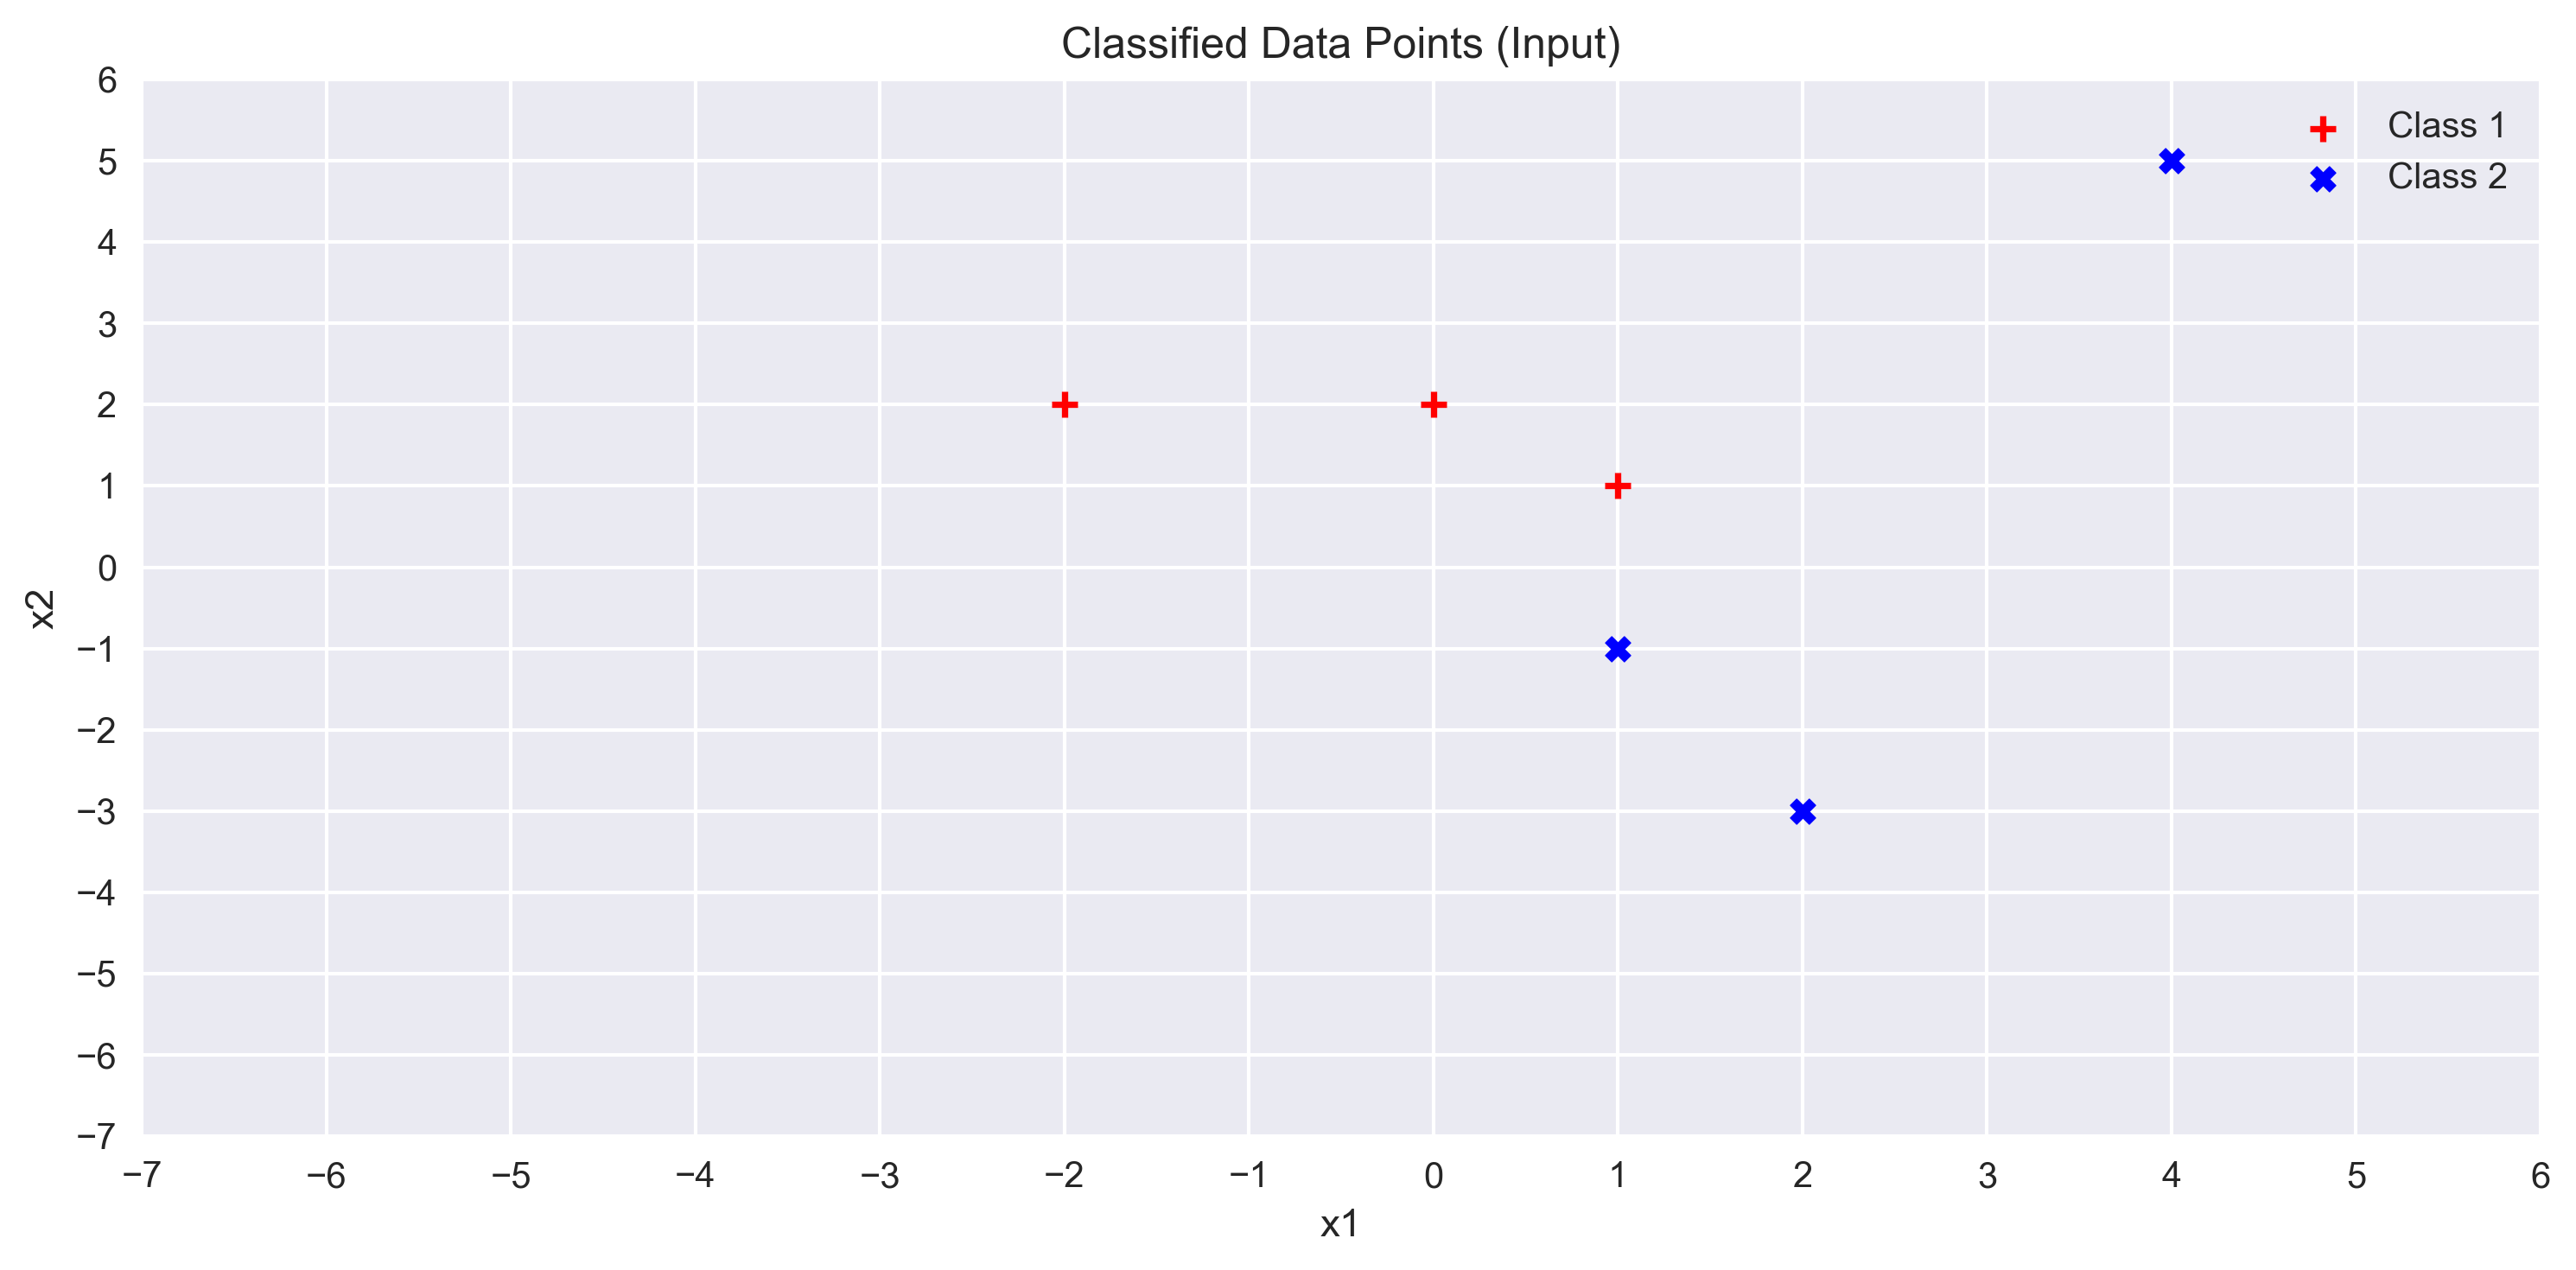

In [9]:
plt.figure(figsize=(10,5),dpi=300);
plt.style.use('seaborn');
#class 1
x_data =[class1[i][0] for i in range(len(class1))];
y_data =[class1[i][1] for i in range(len(class1))];
plt.scatter(x_data , y_data, marker='+', color = 'r', label = 'Class 1');

#class 2
x_data =[class2[i][0] for i in range(len(class2))];
y_data =[class2[i][1] for i in range(len(class2))];
plt.scatter(x_data , y_data, marker='X', color = 'b', label = 'Class 2');

plt.xlabel("x1");
plt.ylabel("x2");
plt.title("Classified Data Points (Input)")
plt.grid(True); #create a grid layout
plt.tight_layout(); #creates a perfect padding style
plt.xticks(list(range(-7,7)));
plt.yticks(list(range(-7,7)));
plt.legend(loc='best');
plt.show();

In [19]:
prior1 = prior2 = 0.5;
W = np.linalg.inv(Σ1) - np.linalg.inv(Σ2);
w = np.matmul(µ1, np.linalg.inv(Σ1)) - np.matmul(µ2 , np.linalg.inv(Σ2));
w = w*2;
w0 = - np.log(np.linalg.det(Σ2)/np.linalg.det(Σ1)) + 2*np.log(prior1/prior2) + np.matmul(np.matmul(µ1, np.linalg.inv(Σ1)), µ1) - np.matmul(np.matmul(µ2, np.linalg.inv(Σ2)), µ2)

db = []
i = 0.0
for j in range(-80, 25):
  i = j * 0.1
  c = W[0][0]*i*i - w[0]*i + w0
  b = W[0][1]*i + W[1][0]*i - w[1]
  a = W[1][1]
  
  y = (-b+np.sqrt(b*b - 4*a*c))/(2*a)
  db.append([i, y])

print(db);


[[-8.0, -4.7780450714243585], [-7.9, -4.678296060094183], [-7.800000000000001, -4.578582973250611], [-7.7, -4.478907032105486], [-7.6000000000000005, -4.379269513764758], [-7.5, -4.279671754457815], [-7.4, -4.180115152992964], [-7.300000000000001, -4.080601174457682], [-7.2, -3.9811313541840616], [-7.1000000000000005, -3.8817073020018853], [-7.0, -3.782330706803876], [-6.9, -3.683003341450207], [-6.800000000000001, -3.583727068041857], [-6.7, -3.4845038435956877], [-6.6000000000000005, -3.3853357261571966], [-6.5, -3.286224881390815], [-6.4, -3.1871735896916986], [-6.300000000000001, -3.0881842538677624], [-6.2, -2.9892594074458416], [-6.1000000000000005, -2.8904017236617703], [-6.0, -2.7916140252009334], [-5.9, -2.692899294763061], [-5.800000000000001, -2.5942606865337874], [-5.7, -2.4957015386545667], [-5.6000000000000005, -2.3972253867938034], [-5.5, -2.298835978933761], [-5.4, -2.200537291502009], [-5.300000000000001, -2.1023335469917006], [-5.2, -2.00422923323301], [-5.10000000000

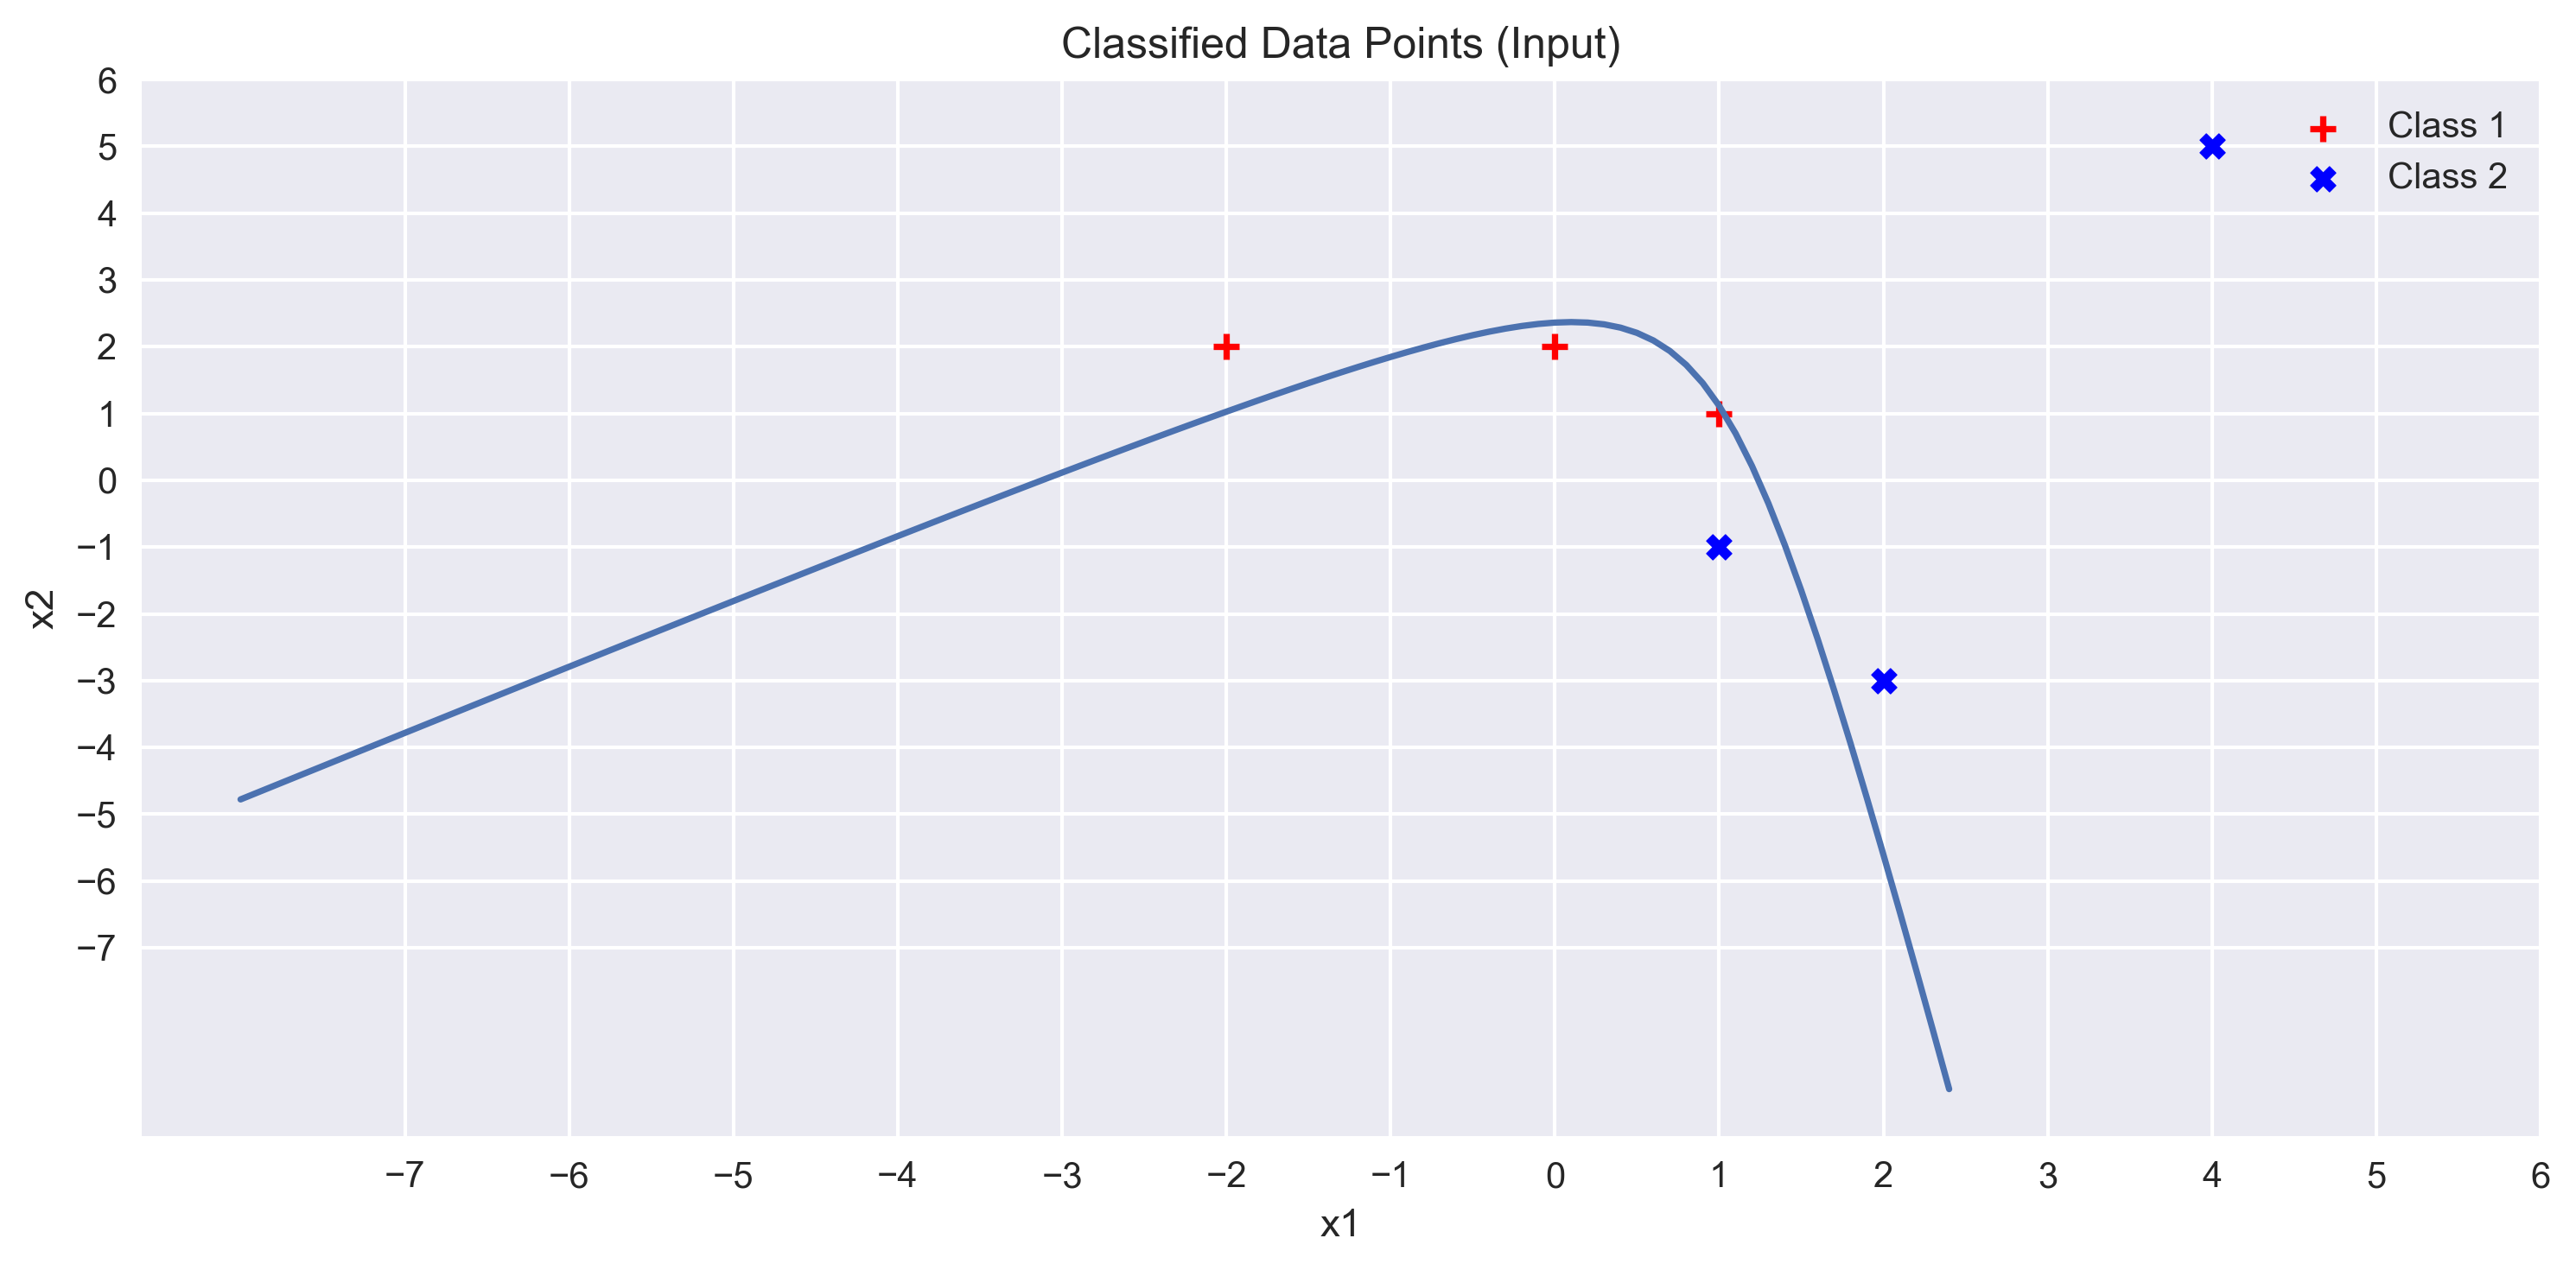

In [20]:
plt.figure(figsize=(10,5),dpi=300);
plt.style.use('seaborn');

#decision boundary
plt.plot([db[i][0] for i in range(len(db))], [db[i][1] for i in range(len(db))])

#class 1
x_data =[class1[i][0] for i in range(len(class1))];
y_data =[class1[i][1] for i in range(len(class1))];
plt.scatter(x_data , y_data, marker='+', color = 'r', label = 'Class 1');

#class 2
x_data =[class2[i][0] for i in range(len(class2))];
y_data =[class2[i][1] for i in range(len(class2))];
plt.scatter(x_data , y_data, marker='X', color = 'b', label = 'Class 2');

plt.xlabel("x1");
plt.ylabel("x2");
plt.title("Classified Data Points (Input)")
plt.grid(True); #create a grid layout
plt.tight_layout(); #creates a perfect padding style
plt.xticks(list(range(-7,7)));
plt.yticks(list(range(-7,7)));
plt.legend(loc='best');
plt.show();

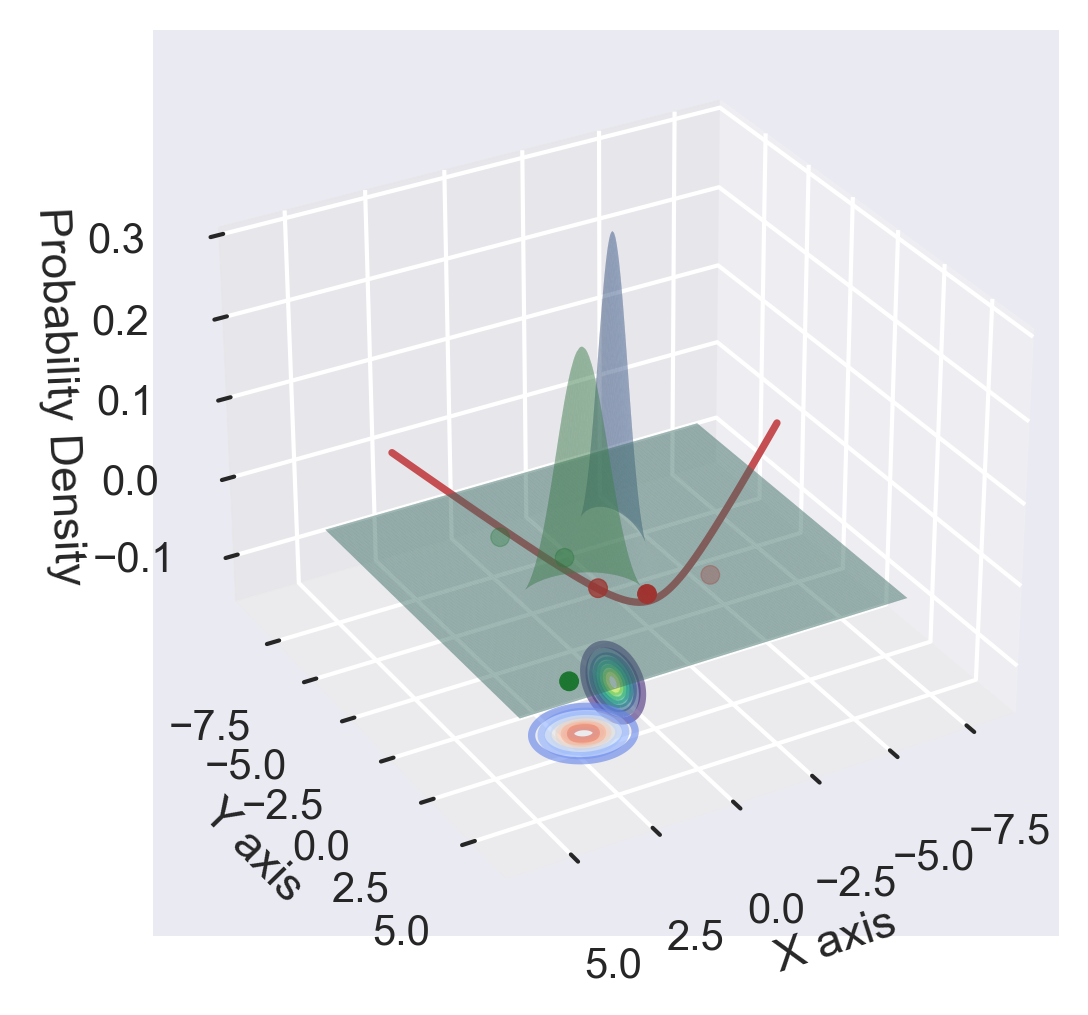

In [22]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

N = 500
X = np.linspace(6, -6, N)
Y = np.linspace(6, -6, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

myFig =plt.figure(figsize=(6,4),dpi=300);
plt.style.use('seaborn');
ax = myFig.gca(projection='3d')

Z1 = multivariate_gaussian(pos, µ1, Σ1)
Z2 = multivariate_gaussian(pos, µ2, Σ2)

ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=0, antialiased=True, alpha = 0.3)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=0, antialiased=True, alpha = 0.3)

cset = ax.contour(X, Y, Z1, zdir='z', offset = -0.15, cmap = cm.viridis, alpha = 0.60)
cset = ax.contour(X, Y, Z2, zdir='z', offset = -0.15, cmap = cm.coolwarm, alpha = 0.60)

x = [class1[i][0] for i in range(len(class1))]
y = [class1[i][1] for i in range(len(class1))]
z = [0] * len(class1)
ax.scatter(x, y, z, c='red', marker='o')

x = [class2[i][0] for i in range(len(class2))]
y = [class2[i][1] for i in range(len(class2))]
z = [0] * len(class2)
ax.scatter(x, y, z, c='green', marker='o')

ax.plot([db[i][0] for i in range(len(db))], [db[i][1] for i in range(len(db))])

ax.set_zlim(-0.15,0.3)

#ax.view_init(27, -21)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.view_init(30, 60)

plt.show()

